# Using `xarray` to work with multi-dimensional data

As we saw in the last notebook, it is possible to work with multidimensional netCDF data in Pandas, but it's a bit cumbersome in that we have to inspect variables and occasionally have to reassign and/or convert their units into more meaningful ones, often going back and forth between the `netCDF4` and `Pandas` (and sometimes the `numpy`) packages. A new-ish Python package called `xarray` (http://xarray.pydata.org/en/stable/) streamlines all that and is much more pleasant to use with netCDF data. 

Here, we use the same dataset as in the previous notebook: downscaled monthly runoff data at a 1/8th degree spatial resolution. We'll see how the `xarray` package can easily read in these data in their netCDF format and use actual axes values (e.g. a date and lat/long coordinate pair to identify values instead of row, column, etc. values). 

In [5]:
#Import libraries
import xarray as xr
import numpy as np
import pandas as pd
from urllib import request
from matplotlib import pyplot as plt

### Load the data into an xarray dataset object
First, we load the netCDF `.nc` file into an xarray **dataset** object. (See the previous notebook for code to download the file if you don't have the dataset file in the data folder.)

In [6]:
#Extract the runoff data into an xarray dataset object
ds = xr.open_dataset('conus_c5.ccsm4_rcp26_r1i1p1.monthly.total_runoff.2000.nc')
type(ds)

xarray.core.dataset.Dataset

In [7]:
#Calling the Dataset objet reveals information about what it contains
ds

<xarray.Dataset>
Dimensions:           (bound: 2, latitude: 222, longitude: 462, time: 12)
Coordinates:
  * time              (time) datetime64[ns] 2000-01-16 2000-02-16 ... 2000-12-15
  * latitude          (latitude) float32 25.1875 25.3125 ... 52.6875 52.8125
  * longitude         (longitude) float32 -124.6875 -124.5625 ... -67.0625
Dimensions without coordinates: bound
Data variables:
    bounds_latitude   (latitude, bound) float64 ...
    bounds_longitude  (longitude, bound) float64 ...
    total_runoff      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:        GDT 1.2
    file_name:          conus_c5.ccsm4_rcp26_r1i1p1.monthly.total_runoff.2000.nc
    History:            Archived Jan 2014
    authors:            Wood, A. and Mizukami, N., with codes from T. Pruitt,...
    description:        Monthly Average VIC Model Output for 1/8th Degree CON...
    creation_date:      2014
    institution:        NCAR, USACE, USBR
    SurfSgnConvention:  Traditional

### Explore the variables
The dataset object's `variables` function returns a dictionary of variable objects. We can list the keys associated with this dictionary to show what variables the dataset contains. And then look at the value of a select variable to see what it looks like.

In [8]:
#Reveal the variables in the dataset
ds.variables.mapping.keys()

odict_keys(['time', 'latitude', 'bounds_latitude', 'longitude', 'bounds_longitude', 'total_runoff'])

In [9]:
#Examine "time" variable; see that it is a 1D array (vector) with 12 values
ds['time'] 

<xarray.DataArray 'time' (time: 12)>
array(['2000-01-16T00:00:00.000000000', '2000-02-16T00:00:00.000000000',
       '2000-03-15T00:00:00.000000000', '2000-04-15T00:00:00.000000000',
       '2000-05-15T00:00:00.000000000', '2000-06-15T00:00:00.000000000',
       '2000-07-15T00:00:00.000000000', '2000-08-15T00:00:00.000000000',
       '2000-09-15T00:00:00.000000000', '2000-10-15T00:00:00.000000000',
       '2000-11-15T00:00:00.000000000', '2000-12-15T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-16 2000-02-16 ... 2000-12-15
Attributes:
    time_origin:  1950-JAN-01 00:00:00
    title:        Time
    long_name:    Time axis
    axis:         T

***Now you try it**: Examine the other variables. How what is the shape of the `latitude` variable? the `total_runoff` variable?

In [10]:
ds['total_runoff']

<xarray.DataArray 'total_runoff' (time: 12, latitude: 222, longitude: 462)>
[1230768 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-16 2000-02-16 ... 2000-12-15
  * latitude   (latitude) float32 25.1875 25.3125 25.4375 ... 52.6875 52.8125
  * longitude  (longitude) float32 -124.6875 -124.5625 ... -67.1875 -67.0625
Attributes:
    associate:  time latitude longitude
    units:      mm/month
    axis:       TYX

### Save a variable's contents into an xarray `DataArray` object
Saving a variable to an object creates a DataArray object, with which we can examine and work with. 

In [11]:
#Save the runoff variable into a single data array
arrRunoff = ds['total_runoff']
type(arrRunoff)

xarray.core.dataarray.DataArray

In [12]:
#Display information about the arrRunoff data array
print(arrRunoff)

<xarray.DataArray 'total_runoff' (time: 12, latitude: 222, longitude: 462)>
[1230768 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-16 2000-02-16 ... 2000-12-15
  * latitude   (latitude) float32 25.1875 25.3125 25.4375 ... 52.6875 52.8125
  * longitude  (longitude) float32 -124.6875 -124.5625 ... -67.1875 -67.0625
Attributes:
    associate:  time latitude longitude
    units:      mm/month
    axis:       TYX


In [13]:
#Extract the time dimension from the data array
arrTime = arrRunoff.time
type(arrTime)

xarray.core.dataarray.DataArray

In [14]:
arrTime2 = ds['time']
type(arrTime2)

xarray.core.dataarray.DataArray

In [15]:
#Display the first 5 records of the arrTime data array
arrTime[:5].data

array(['2000-01-16T00:00:00.000000000', '2000-02-16T00:00:00.000000000',
       '2000-03-15T00:00:00.000000000', '2000-04-15T00:00:00.000000000',
       '2000-05-15T00:00:00.000000000'], dtype='datetime64[ns]')

*In the above, note that the time is already converted to actual time, not to "days since 1900" as in the NetCDF notebook example*

In [16]:
#Extract the lat and long values into separate DataArrays
arrLat = arrRunoff.latitude
arrLon = arrRunoff.longitude

In [17]:
#Display the extents of the data
print("Time:",arrTime.data.min(),arrTime.data.max())
print("Lat: ",arrLat.data.min(),arrLat.data.max())
print("Lon: ",arrLon.data.min(),arrLon.data.max())

Time: 2000-01-16T00:00:00.000000000 2000-12-15T00:00:00.000000000
Lat:  25.1875 52.8125
Lon:  -124.6875 -67.0625


In [18]:
#Show example lat/long values
arrLat[30].data,arrLon[30].data

(array(28.9375, dtype=float32), array(-120.9375, dtype=float32))

## Extract data for one time-location combination
Use the xarray dataset's `sel` function to select the runoff value nearest the specified time and location. This is *much* easier than in the previous notebook where we tried using NumPy and Pandas since Xarray knows how to link the real values (e.g. data, degrees north or east) with index locations... Also the `nearest` function allows us to use time/location coordinates that approximate values that exist in the dataset.

In [19]:
#Set the time and location coordinates for where we want to get a value
theTime = np.datetime64('2000-03-15')
theLat = 36.005
theLon = -78.942

In [20]:
#Extract the value corresponding to the point nearest to the specified time & location
theResult = ds.sel(latitude=theLat,longitude=theLon,time=theTime,method='nearest')

In [21]:
#Show the runoff at that point
theResult.total_runoff.data

array(75.20899963)

***Now you try it**: see if you can find the runoff estimate for St. Louis on October 4, 2000

In [22]:
#Find the runoff estimate for a given time and location

## Plot a time series for one location
Dropping one of the dimensions in the `sel` statement retrieves all data in that dimension fitting the criteria specified in the other dimensions. Here, we omit the time constraint.

In [23]:
#Select only on lat and lon and we get all runoff data for all times
theTimeSeries = ds.sel(latitude=theLat,longitude=theLon,method='nearest')

In [24]:
#Extract the precipitation data array from the filtered dataset
ts_Runoff = theTimeSeries.total_runoff

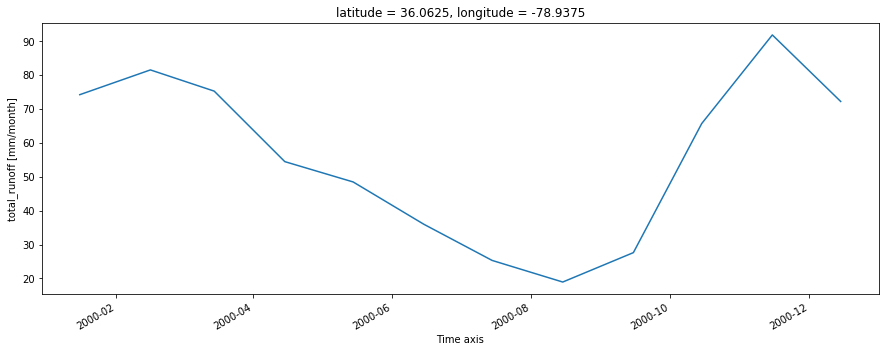

In [25]:
#Plot the time series
fig = plt.figure(figsize=(15,5))
ts_Runoff.plot.line();

Note that plotting an xarray data array gives nice axis labels and titles by default!

## Map runof for one time period

In [26]:
#Drop the lat and lon filters to grab data for all locations
theMapResult = ds.sel(time=theTime).total_runoff

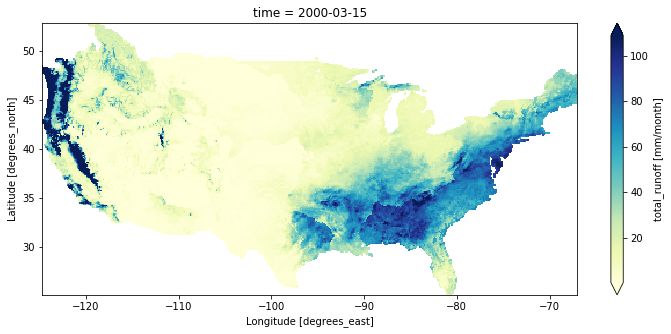

In [27]:
#Plot the data
fig = plt.figure(figsize=(12,5))
theMapResult.plot(cmap="YlGnBu", #Specifies the colors to use
                  robust=True);  #Drops outliers (<2%,>98%) from plot

## Create a spatial subset
We uses "slices" to extract subsets of data. Here we subset the data spatially and compute the mean

In [28]:
#Specify the spatial slices to grab
theLats = slice(25,36.5)
theLons = slice(-91,-76)

In [29]:
#Extract the spatial subset into its own data array
theSubset = ds.sel(longitude=theLons,latitude=theLats).total_runoff

In [30]:
#Display the shape of the returned data array
theSubset.shape

(12, 91, 120)

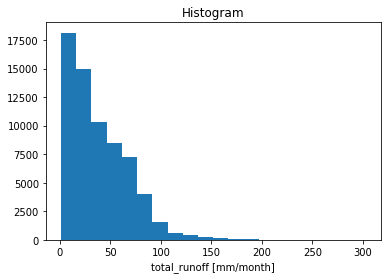

In [31]:
#Plot a histogram of the data within the subset
theSubset.plot(bins=20);

C:\Users\jpfay\AppData\Local\ESRI\conda\envs\my_env\lib\site-packages\xarray\core\nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


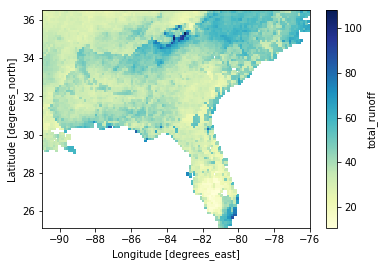

In [32]:
#Compute the mean across the time axis (the 0th axis) and show a map
theSubsetAvg = theSubset.mean(axis=0)
theSubsetAvg.plot(cmap="YlGnBu");

C:\Users\jpfay\AppData\Local\ESRI\conda\envs\my_env\lib\site-packages\xarray\core\nputils.py:222: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwds)
C:\Users\jpfay\AppData\Local\ESRI\conda\envs\my_env\lib\site-packages\xarray\core\nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


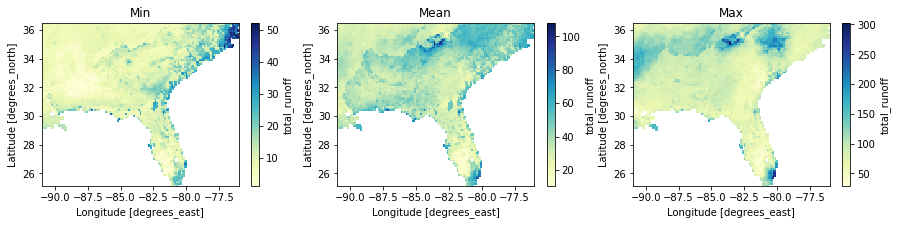

In [33]:
#Fancier plots
#Create the canvas
plt.figure(figsize=(15,3)) 
#In the first of a 1x3 set of subplots, plot the min across all samples at each location
plt.subplot(1,3,1)
theSubset.min(axis=0).plot(cmap="YlGnBu")
plt.title("Min")
#In the second of a 1x3 set of subplots, plot the mean
plt.subplot(1,3,2)
theSubset.mean(axis=0).plot(cmap="YlGnBu")
plt.title("Mean")
#In the third of a 1x3 set of subplots, plot the max
plt.subplot(1,3,3)
theSubset.max(axis=0).plot(cmap="YlGnBu")
plt.title("Max")
plt.show();

## Calculate summer (JJA) average
The `xarray` package supports seasons to make easy seasonal averages. 

In [34]:
#Create a new data array by converting the dates in the `time` array to seasons
arrSeason = ds['time'].dt.season

In [35]:
#Replace the time dimension with season values
ds['time'] = ds['time'].dt.season

In [36]:
#Extract precipitation for just the summer months; we have 48 summers of data
summerRunoff = ds.sel(time='JJA',latitude=theLats,longitude=theLons).total_runoff
summerRunoff.shape

(3, 91, 120)

C:\Users\jpfay\AppData\Local\ESRI\conda\envs\my_env\lib\site-packages\xarray\core\nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


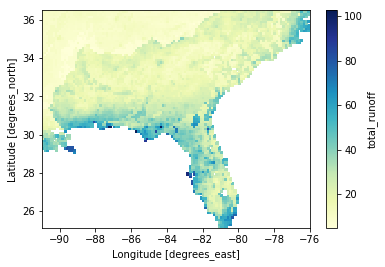

In [37]:
#Reduce the three selected months into one summer average and plot it
meanSummerRunoff = summerRunoff.mean(axis=0)
meanSummerRunoff.plot(cmap="YlGnBu");

C:\Users\jpfay\AppData\Local\ESRI\conda\envs\my_env\lib\site-packages\xarray\core\nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\jpfay\AppData\Local\ESRI\conda\envs\my_env\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


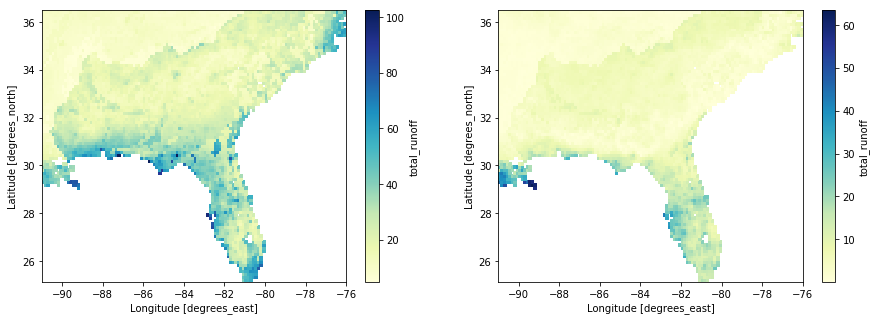

In [40]:
#Fancier plots
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
summerRunoff.mean(axis=0).plot(cmap="YlGnBu")
plt.subplot(1,2,2)
summerRunoff.std(axis=0).plot(cmap="YlGnBu")
#plt.subplot(1,3,3)
#summerPrecip.max(axis=0).plot(cmap="YlGnBu")
plt.show();

---
## Recap
With more an more groups providing data in multi-dimensional netCDF format, it's useful to know how to wrangle these data to get what you want. We saw before that the Python `netCDF4` package, along with `NumPy` and `Pandas` does give us control over these datasets, but here we see that developers are constantly making our lives a touch easier by developing packages that just make things easier. **Still**, it's alway good to at least once struggle through data with the basic packages as it gives us a more intimate working knowledge of how the data are strucutred and what exactly is going on behind the scenes of these newer packages 